In [21]:
import numpy as np
import pandas as pd
import reconstruction
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
table = pd.read_excel ('Acoefs.xlsx')

print (type (table.acoefs [1]))

table.acoefs [1]

<class 'str'>


'[0.27538705 0.26066376 0.25324816 0.26099107]'

In [3]:
def acoef_str2list (str_representation:str) -> list:
    str_values = str_representation [1:-1].split ()
    float_list = [float (value) for value in str_values]
    
    return float_list

temp = acoef_str2list (table.acoefs [1])

temp

[0.27538705, 0.26066376, 0.25324816, 0.26099107]

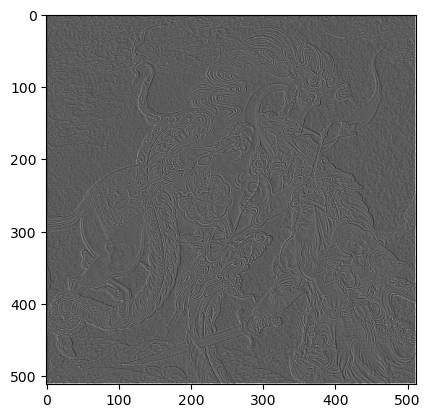

In [4]:
file_path = 'test_pics/Downloaded Persian Miniatures - Cropped and Resized/' + table.file_name [1]

pic_src = cv.imread (file_path)
pic = cv.cvtColor(pic_src, cv.COLOR_BGR2GRAY) 

pic = reconstruction.image_resize (pic, height= 512)

pic_reconstructed = reconstruction.reconstructPicfromACoefs (temp, pic)
diff = reconstruction.createDiffMatrixFromMatrices (pic, pic_reconstructed)

plt.imshow (diff, cmap= 'gray')

In [1]:
import reconstruction as re
import DataframeCreator as dfc
import pandas as pd

test_files_directory = 'test_pics/Downloaded Persian Miniatures - Cropped and Resized/'
output_files_directory = 'output/'
excel_directory = 'Acoefs.xlsx'

df = pd.read_excel (excel_directory)
df_2 = re.addGaussianParsToDataFrame (df, test_files_directory)
# dfc.exportDataFrameToExcel (df, 'data.xlsx')

In [2]:
df_2

,file_name,acoefs,aCoefs_optimized,mean,std
0,Miniatura_en_mural_persa_de_Chehel_Sotun_(pala...,[0.27668732 0.26514419 0.24633275 0.25633574],[0.34495949 0.14843668 0.26450793 0.24417103],1022.875,2665.201647
1,"Miniatura_persa,_Batalla_entre_Rostam_y_Dragn.jpg",[0.27538705 0.26066376 0.25324816 0.26099107],[0.31377693 0.22399336 0.29668688 0.17556005],1018.0,2080.173714
2,"Miniatura_persa,_del_libro_Khamse_o_Panj_Ganj_...",[0.25878809 0.26593088 0.24931682 0.26761977],[0.29421388 0.15952316 0.29602125 0.25434889],1018.917969,2064.462142
3,"Miniatura_persa,_Estrofa_(Gua_espiritual,_rode...",[0.24790795 0.28028019 0.24046517 0.26046463],[0.27478799 0.28986748 0.23034301 0.20584666],1016.328125,3252.498864
4,"Miniatura_persa,_Ghoghnus_(fnix)_0.jpg",[0.26633834 0.25171772 0.27564386 0.24842328],[0.33905177 0.17257952 0.24885778 0.24127099],1022.921875,2502.478643
...,...,...,...,...,...
85,Lgrimas doradas - Obras maestras de la miniatu...,[0.24867189 0.25842231 0.27131485 0.26393419],[0.28909108 0.23151889 0.22772929 0.25020163],1017.636719,2995.013843
86,"Manantiales de fascinacin.( detalle )1984 , Ob...",[0.26189986 0.26250907 0.25768702 0.25431434],[0.31677027 0.21004493 0.24425017 0.22211511],1022.886719,2875.398228
87,"Mensajeros de la divinidad.1962 , Obras maestr...",[0.24229939 0.25192709 0.27737699 0.26608947],[0.33182916 0.10778672 0.30271368 0.26217195],1021.734375,2206.357085
88,Miniatura_en_mural_de_Chehel_Sotun_(palacio_de...,[0.26244146 0.25707447 0.25921772 0.26352628],[0.33813114 0.15420777 0.28939114 0.21921475],1018.636719,2563.540773


In [3]:
dfc.exportDataFrameToExcel (df, 'data.xlsx')